2022-03-22 14:19:26.783860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/usr/talib/lib:/home/ubuntu/usr/talib/lib:
2022-03-22 14:19:26.783894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2000      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 80)                6480      
                                                                 
 dense_4 (Dense)             (None, 1)                 81        
                                                                 
Total params: 21,521
Trainable params: 21,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-03-22 14:19:28.479669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/usr/talib/lib:/home/ubuntu/usr/talib/lib:
2022-03-22 14:19:28.479712: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-22 14:19:28.479732: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VM-4-16-ubuntu): /proc/driver/nvidia/version does not exist
2022-03-22 14:19:28.480027: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 1s 33ms/step - loss: 0.0013 - accuracy: 0.6203 - val_loss: 0.6801 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.6540 - val_loss: 0.6526 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.6667 - val_loss: 0.6227 - val_accuracy: 0.6597 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.6835 - val_loss: 0.6163 - val_accuracy: 0.6681 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.6793 - val_loss: 0.6161 - val_accuracy: 0.6681 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.6878 - val_loss: 0.6119 - val_accuracy: 0.6723 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.6892 - 

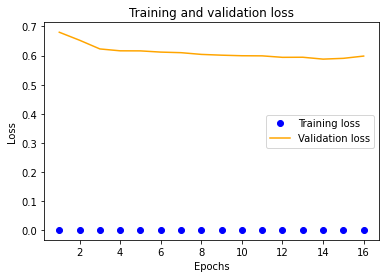

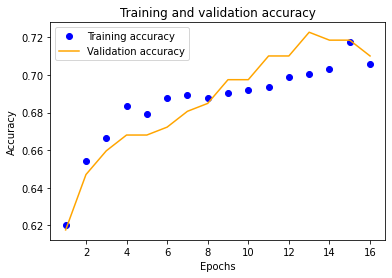

[[82 18]
 [17 34]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.65      0.67      0.66        51

    accuracy                           0.77       151
   macro avg       0.74      0.74      0.74       151
weighted avg       0.77      0.77      0.77       151

0.8037254901960785


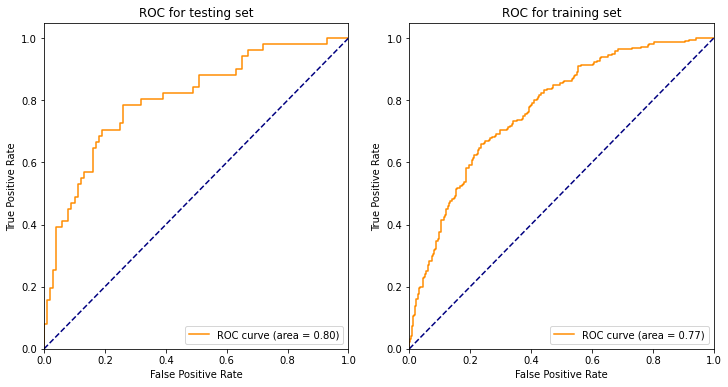

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle  
# for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# set random seed
my_seed = 80
np.random.seed(my_seed)
import random 
random.seed(my_seed)
tf.random.set_seed(my_seed)
# package for checking results
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve

class nnClassifier():
    def __init__(self, train_address = '../data/pca_train.csv', test_address = '../data/pca_test.csv'):
        self.lam = None
        self.lr = None
        self.train_address = train_address
        self.test_address = test_address
        self.dataLoad()

    def dataLoad(self):
        self.origin_train = pd.read_csv(self.train_address)
        self.origin_train = shuffle(self.origin_train)  
        self.origin_test = pd.read_csv(self.test_address)

    def nnFitting(self,N_HIDDEN = 80, activate = "tanh", optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)):
        '''
        input: hidden units, activation function and optimizer
                 choose activation function from [relu, sigmoid, softplus, softmax, softsign, tanh, selu, elu]
                 choose optimizers from [Adam, Nadam, Adagrad, Adamax, Ftrl]
        output: the fitted model
        You can adjust the layers and units by yourself
        '''
        y = self.origin_train['class']
        x = self.origin_train.drop(['class'], axis = 1)
        # x_norm = x.apply(lambda t:(t - np.min(t)) / (np.max(t) - np.min(t)))
        # x_norm = x.apply(lambda t:((t - np.mean(t)) / np.std(t)))
        x_norm = x
        X = np.array(x_norm)
        self.model = Sequential()
        # choose activation function from [relu, sigmoid, softplus, softmax, softsign, tanh, selu, elu]

        activate = activate

        # add layers in the nn model
        self.model.add(Dense(N_HIDDEN, input_shape=(X.shape[1],), activation=activate)) # Add an input shape (features,)
        # model.add(Dropout(.3))
        self.model.add(Dense(N_HIDDEN, activation=activate))
        # model.add(Dropout(.3))
        self.model.add(Dense(N_HIDDEN, activation=activate))
        # model.add(Dropout(.3))
        self.model.add(Dense(N_HIDDEN, activation=activate))
        # model.add(Dropout(.3))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.summary() 

        # compile the model 
        # choose optimizers from [Adam, Nadam, Adagrad, Adamax, Ftrl]
        opt = optimizer
        self.model.compile(optimizer = opt, 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

        # callbacks
        es_val_loss = EarlyStopping(monitor='val_loss',patience = 2)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                        patience=2, verbose=1, mode='auto',
                                        min_delta=0.0001, cooldown=0, min_lr=1e-8)

        # for unblanced dataset, set weights for class_i by (1 / number of class_i)
        counts = np.bincount(y)
        weight_for_0 = 1.0 / counts[0]
        weight_for_1 = 1.0 / counts[1]
        class_weight = {0: weight_for_0, 1: weight_for_1}

        # now we just update our model fit call
        self.history = self.model.fit(X,
                                y,
                                callbacks=[reduce_lr, es_val_loss],
                                epochs=100, # you can set this to a big number
                                batch_size=128,
                                validation_split = 0.25,
                                shuffle=True,
                                class_weight = class_weight,
                                verbose=1)
    
    def nnFittingVisualization(self):
        '''
        give the result on training and validation set
        output: two graphs, one for loss and one for accuracy
        '''
        history_dict = self.history.history
        # Learning curve(Loss)
        # let's see the training and validation loss by epoch

        # loss
        loss_values = history_dict['loss'] # you can change this
        val_loss_values = history_dict['val_loss'] # you can also change this

        # range of X (no. of epochs)
        epochs = range(1, len(loss_values) + 1) 

        # plot
        plt.plot(epochs, loss_values, 'bo', label='Training loss')
        plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        acc = self.history.history['accuracy']
        val_acc = self.history.history['val_accuracy']

        # range of X (no. of epochs)
        epochs = range(1, len(acc) + 1)

        # plot
        # "bo" is for "blue dot"
        plt.plot(epochs, acc, 'bo', label='Training accuracy')
        # orange is for "orange"
        plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def testResult(self):  
        '''
        give the results on test set
        '''
        test_y = self.origin_test['class']
        test_x = self.origin_test.drop(['class'], axis = 1)
        # you can choose to standard the dataset if you haven't done it in the preprocession
        # test_norm = test_x.apply(lambda t:(t - np.min(t)) / (np.max(t) - np.min(t)))
        # test_norm = test_x.apply(lambda t:((t - np.mean(t)) / np.std(t)))
        test_norm = test_x
        test_x = np.array(test_norm)
        predicition = self.model.predict(test_x)
        preds = np.round(self.model.predict(test_x),0)
        confu_matrix = confusion_matrix(test_y, preds)
        result_report = classification_report(test_y, preds)
        AUC = roc_auc_score(test_y, predicition)
        print(confu_matrix)
        print(result_report)
        print(AUC)

        score = self.model.predict(test_x)
        auc = roc_auc_score(test_y, score)
        fpr, tpr, _ = roc_curve(test_y, score)
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.plot(fpr, tpr, color='darkorange',
                label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for testing set')
        plt.legend(loc="lower right")

        train_x = self.origin_train.drop(['class'], axis = 1)
        train_y = self.origin_train['class']
        score = self.model.predict(train_x)
        auc = roc_auc_score(train_y, score)
        fpr, tpr, _ = roc_curve(train_y, score)
        plt.subplot(122)
        plt.plot(fpr, tpr, color='darkorange',
                label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for training set')
        plt.legend(loc="lower right")
        plt.show()
        return preds

if __name__=="__main__":
    p = nnClassifier()
    p.nnFitting()
    p.nnFittingVisualization()
    p.testResult()
